In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
import re
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("goemotions_1.csv")
df.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  70000 non-null  object 
 1   id                    70000 non-null  object 
 2   author                70000 non-null  object 
 3   subreddit             70000 non-null  object 
 4   link_id               70000 non-null  object 
 5   parent_id             70000 non-null  object 
 6   created_utc           70000 non-null  float64
 7   rater_id              70000 non-null  int64  
 8   example_very_unclear  70000 non-null  bool   
 9   admiration            70000 non-null  int64  
 10  amusement             70000 non-null  int64  
 11  anger                 70000 non-null  int64  
 12  annoyance             70000 non-null  int64  
 13  approval              70000 non-null  int64  
 14  caring                70000 non-null  int64  
 15  confusion          

In [4]:
df.shape

(70000, 37)

In [5]:
df.isnull().sum()

text                    0
id                      0
author                  0
subreddit               0
link_id                 0
parent_id               0
created_utc             0
rater_id                0
example_very_unclear    0
admiration              0
amusement               0
anger                   0
annoyance               0
approval                0
caring                  0
confusion               0
curiosity               0
desire                  0
disappointment          0
disapproval             0
disgust                 0
embarrassment           0
excitement              0
fear                    0
gratitude               0
grief                   0
joy                     0
love                    0
nervousness             0
optimism                0
pride                   0
realization             0
relief                  0
remorse                 0
sadness                 0
surprise                0
neutral                 0
dtype: int64

In [6]:
df.columns[9:]

Index(['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
       'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
       'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
       'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
       'relief', 'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')

We need to clean above data set as there are lots of unnecessary symbols and notations in text and other columns.
Also we will make data according to the model training.

In [7]:
##Cleaning the text column using clean text function.
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+",'',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^a-zA-Z\s]','',text)
    return text

In [8]:
df['clean_text'] = df['text'].apply(clean_text)

In [9]:
df[['text', 'clean_text']].head()

,text,clean_text
0,That game hurt.,that game hurt
1,>sexuality shouldn’t be a grouping category I...,sexuality shouldnt be a grouping category it ...
2,"You do right, if you don't care then fuck 'em!",you do right if you dont care then fuck em
3,Man I love reddit.,man i love reddit
4,"[NAME] was nowhere near them, he was by the Fa...",name was nowhere near them he was by the falcon


Tokenizing and padding has tobe done.

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'])
sequences = tokenizer.texts_to_sequences(df['clean_text'])

length = 50
X = pad_sequences(sequences, maxlen = length, padding='post')

In [12]:
emotion_columns = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
                   'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment',
                   'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism',
                   'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']

y = df[emotion_columns].values ## 1 --> present | 0 --> absent (multilabel)

In [13]:
from sklearn.model_selection import train_test_split

Spliting the values for training and testing purposes. 70% data will be trained and remaining will be tested.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
print(X_train.dtype)
print(y_train.dtype)


int32
int64


In [16]:
X_train = np.array(X_train).astype('float32')
X_test = np.array(X_test).astype('float32')

y_train = np.array(y_train).astype('float32')
y_test = np.array(y_test).astype('float32')

In [17]:
#Using RNN technology to train the model from both forward and backward directions.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

In [18]:
model = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=50),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(28, activation='sigmoid')
])

In [19]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
#training the model
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

history = model.fit(
    X_train,
    y_train,
    epochs=20,              
    batch_size=64,
    validation_data=(X_test, y_test)
) 

Epoch 1/20
766/766 ━━━━━━━━━━━━━━━━━━━━ 116s 151ms/step - accuracy: 0.7072 - auc: 0.9937 - loss: 0.0356 - val_accuracy: 0.2976 - val_auc: 0.7021 - val_loss: 0.5659
Epoch 2/20
766/766 ━━━━━━━━━━━━━━━━━━━━ 117s 153ms/step - accuracy: 0.7061 - auc: 0.9935 - loss: 0.0356 - val_accuracy: 0.2886 - val_auc: 0.7005 - val_loss: 0.5568
Epoch 3/20
766/766 ━━━━━━━━━━━━━━━━━━━━ 116s 152ms/step - accuracy: 0.7075 - auc: 0.9935 - loss: 0.0359 - val_accuracy: 0.2951 - val_auc: 0.7012 - val_loss: 0.5697
Epoch 4/20
766/766 ━━━━━━━━━━━━━━━━━━━━ 118s 154ms/step - accuracy: 0.7029 - auc: 0.9931 - loss: 0.0365 - val_accuracy: 0.2915 - val_auc: 0.7001 - val_loss: 0.5693
Epoch 5/20
766/766 ━━━━━━━━━━━━━━━━━━━━ 119s 156ms/step - accuracy: 0.7112 - auc: 0.9935 - loss: 0.0351 - val_accuracy: 0.2879 - val_auc: 0.7001 - val_loss: 0.5719
Epoch 6/20
766/766 ━━━━━━━━━━━━━━━━━━━━ 118s 154ms/step - accuracy: 0.7054 - auc: 0.9936 - loss: 0.0354 - val_accuracy: 0.2889 - val_auc: 0.6996 - val_loss: 0.5742
Epoch 7/20
766/7

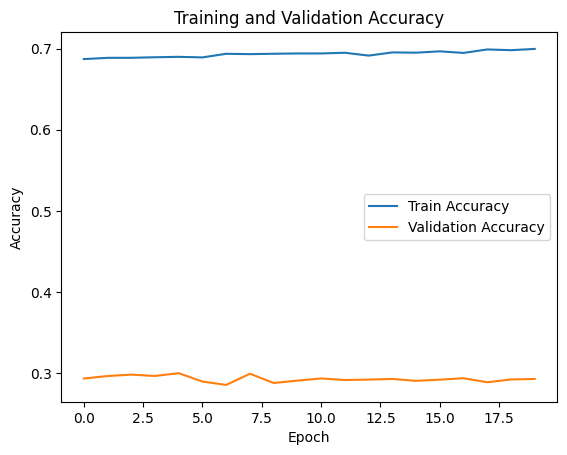

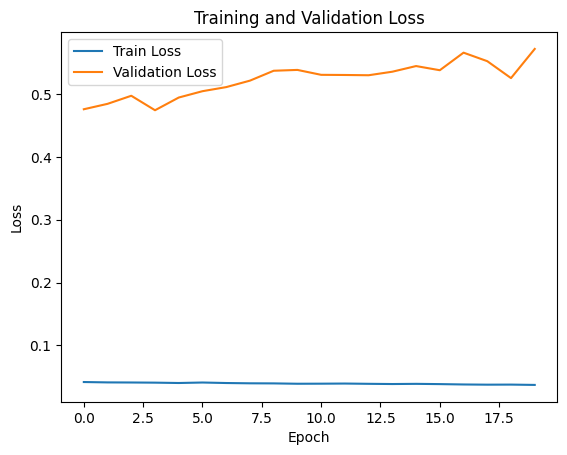

In [25]:
#Ploting the accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Ploting the loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [39]:
#test_text = ["I'm feeling really anxious and nervous about tomorrow."]
#sequence = tokenizer.texts_to_sequences(test_text)
#padded = pad_sequences(sequence, maxlen=length, padding='post')
#prediction = model.predict(padded)
#print(prediction)


def predict_emotions(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=length, padding='post')
    pred = model.predict(padded)[0]
    plt.figure(figsize=(12,6))
    bars = plt.bar(emotion_columns, pred, color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.title("Emotions Predictions Probabilities")
    plt.ylabel("Probability")
    plt.tight_layout()
    for bar, prob in zip(bars, pred):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{prob:0.2f}', ha='center', va = 'bottom', fontsize=8)
    plt.show()

    top_emotions = np.argsort(pred)[::-1]
    print("\nTop 3 predicted emotions:")
    for i in top_emotions[:3]:
        print(f"{emotion_columns[i]}: {pred[i]:0.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


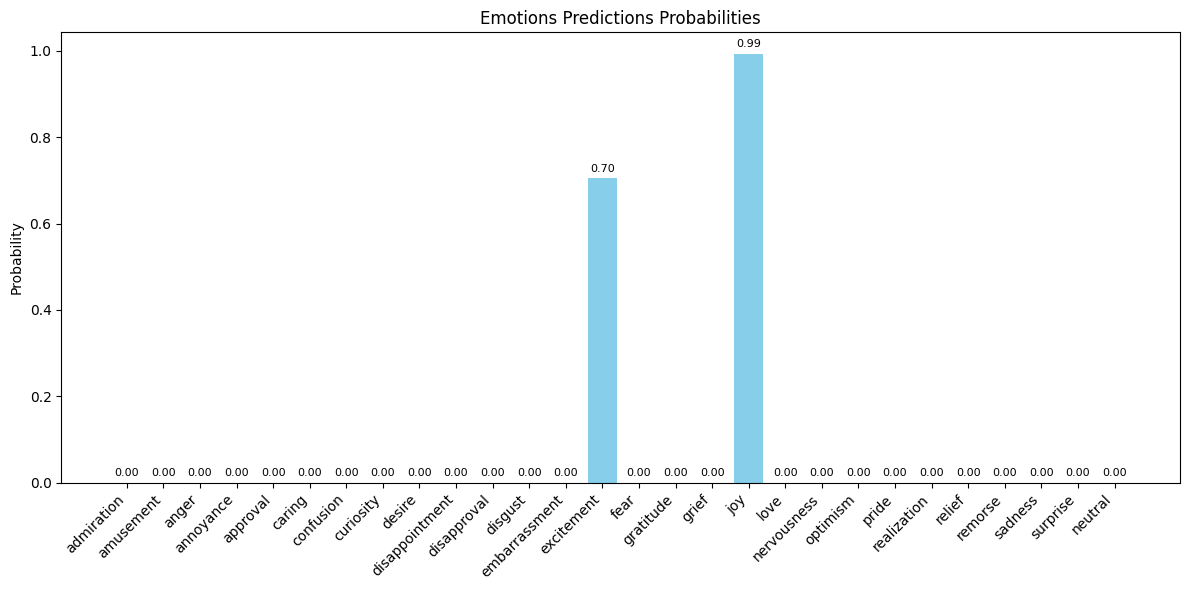


Top 3 predicted emotions:
joy: 0.99
excitement: 0.70
surprise: 0.00


In [40]:
#testing result

predict_emotions("I can't believe how happy I feel today!")

In [45]:
import pickle
model.save("model/emotions_model.h5")

with open("tokenizer/tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)